## Introduction

In this notebook we will analyze and predict with machine learning models customer *churn* in a bank. 

The task is a typical **supervised binary classification** exercise. We want to determine if customers will stop using a company's products or services or will remain in the same company.

It is estimated that acquiring a new customer can cost up to **five times more** than retaining an existing one.


<br>



**What Is Churn Rate?**

The churn rate, also known as the rate of attrition or customer churn, is the rate at which customers stop doing business with an entity. It is most commonly expressed as the percentage of service subscribers who discontinue their subscriptions within a given time period. It is also the rate at which employees leave their jobs within a certain period. For a company to expand its clientele, its growth rate (measured by the number of new customers) must exceed its churn rate.






#### Import Libraries 📚


In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#!pip install fast_ml --quiet
from fast_ml.model_development import train_valid_test_split


from imblearn.under_sampling import RandomUnderSampler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix


from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

### Define Color Palette 🎨

In [145]:
colors = ['#e0fbfc', '#ee6c4d', '#98c1d9', '#3d5a80', '#293241']
sns.set_palette(sns.color_palette(colors))

## Read Data 👓

The dataset contains a list of 10,000 clients of a bank with the following **attributes:**

* RowNumber
* CustomerId
* Surname
* CreditScore
* Geography
* Gender
* Tenure
* Balance
* NumOfProducts
* HasCrCard
* IsActiveMember
* EstimatedSalary

And the following **target:**
* Exited
    * 0: Customers Not Churned 
    * 1: Customers Churned



In [184]:
df = pd.read_csv("./data/churn.csv")

print("Rows:", df.shape[0])
print("Columns:", df.shape[1])

df.head()

Rows: 10000
Columns: 14


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Very BASIC Cleaning 🧹

We do not want to contaminate our data or get insights before we divide into train, validation and test.

In [185]:
# Remove first column
df.drop(columns=['RowNumber'],inplace=True)

# Rename Exited column as: target
df = df.rename(columns={'Exited': 'target'})

# Set index to start from 1 to n
# df.index = np.arange(1,len(df)+1)
df.head()


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,target
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Separate Data into Train, Validation and Test ✂️

<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*NQaN71ejH_eTUxhRLwiJcA.png" alt="drawing" width="650"/>

<!---
https://medium.com/@utkarsh.kant/how-to-split-your-dataset-into-train-test-and-validation-sets-17f40e98dfd0
-->





In [186]:
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df,
                                                                           target="target",
                                                                           train_size=0.6,
                                                                           valid_size=0.2,
                                                                           test_size=0.2)
# View size
print(X_train.shape,y_train.shape )
print(X_valid.shape,y_valid.shape )
print(X_test.shape,y_test.shape )


(6000, 12) (6000,)
(2000, 12) (2000,)
(2000, 12) (2000,)


## Exploratory Data Analysis 📈

All of our insights will be done in **train**. As mentioned earlier we do not want to peek and make assumptions with information from validation or test.

In [260]:
# Even though I call it df (for convention) we should think of it as df_train in our head.

df = pd.concat([X_train, y_train],ignore_index=False,axis=1,sort=False)
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,target
3553,15626612,Yin,741,Spain,Male,40,4,104784.23,1,1,0,135163.76,1
2994,15710257,Matveyeva,625,France,Female,39,3,130786.92,1,0,1,121316.07,0
564,15788126,Evans,689,Spain,Female,38,6,121021.05,1,1,1,12182.15,0
8275,15737489,Ramsden,610,Spain,Female,46,5,116886.59,1,0,0,107973.44,0
4826,15713346,Panina,794,France,Male,24,10,146126.75,1,1,1,88992.05,0


In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 3553 to 7944
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       6000 non-null   int64  
 1   Surname          6000 non-null   object 
 2   CreditScore      6000 non-null   int64  
 3   Geography        6000 non-null   object 
 4   Gender           6000 non-null   object 
 5   Age              6000 non-null   int64  
 6   Tenure           6000 non-null   int64  
 7   Balance          6000 non-null   float64
 8   NumOfProducts    6000 non-null   int64  
 9   HasCrCard        6000 non-null   int64  
 10  IsActiveMember   6000 non-null   int64  
 11  EstimatedSalary  6000 non-null   float64
 12  target           6000 non-null   int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 656.2+ KB


In [193]:
# Check for any NaN in df
df.isna().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
target             0
dtype: int64

In [194]:
# Get general numerical information.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerId,6000.0,1.569099e+07,72201.061046,15565701.00,15628255.25,1.569130e+07,1.575334e+07,15815690.00
CreditScore,6000.0,6.502702e+02,96.773545,350.00,582.00,6.520000e+02,7.170000e+02,850.00
Age,6000.0,3.891000e+01,10.483633,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,6000.0,5.053000e+00,2.880146,0.00,3.00,5.000000e+00,8.000000e+00,10.00
Balance,6000.0,7.700496e+04,62334.389420,0.00,0.00,9.752216e+04,1.279283e+05,250898.09
NumOfProducts,6000.0,1.526667e+00,0.581961,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,6000.0,7.101667e-01,0.453723,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,6000.0,5.178333e-01,0.499724,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,6000.0,9.997293e+04,57726.091716,90.07,50768.32,1.000003e+05,1.493859e+05,199953.33
target,6000.0,2.050000e-01,0.403735,0.00,0.00,0.000000e+00,0.000000e+00,1.00


In [178]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

### Numerical Features vs. Target

Plot numerical features vs target to see if we can get any insights.

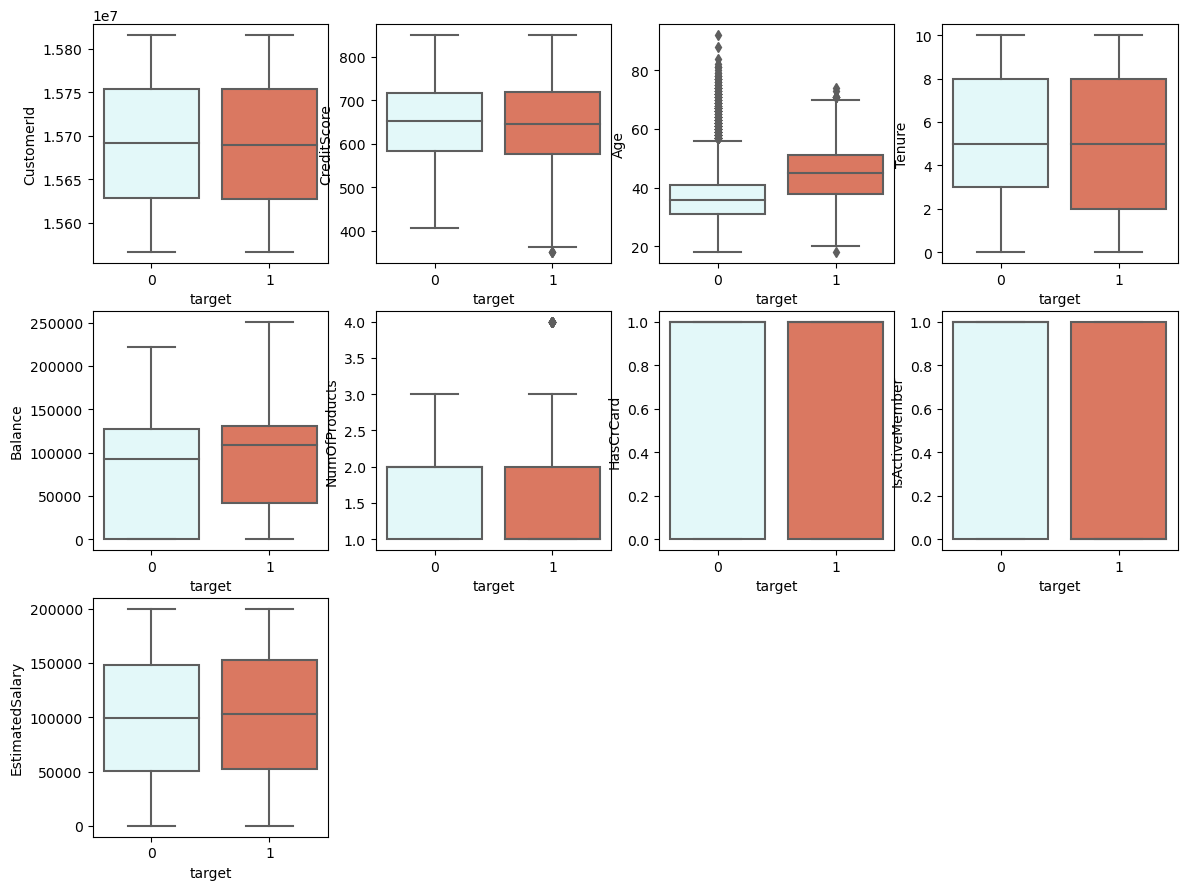

In [195]:
# BOX PLOT

cat_list= ["CustomerId", "CreditScore",	"Age","Tenure", "Balance",	"NumOfProducts","HasCrCard", "IsActiveMember","EstimatedSalary"]
fig = plt.figure(figsize =(14,18))

for i in range(len(cat_list)):
    column = cat_list[i]
    sub = fig.add_subplot(5,4,i+1)
    sns.boxplot( x = "target", y = column, data = df)

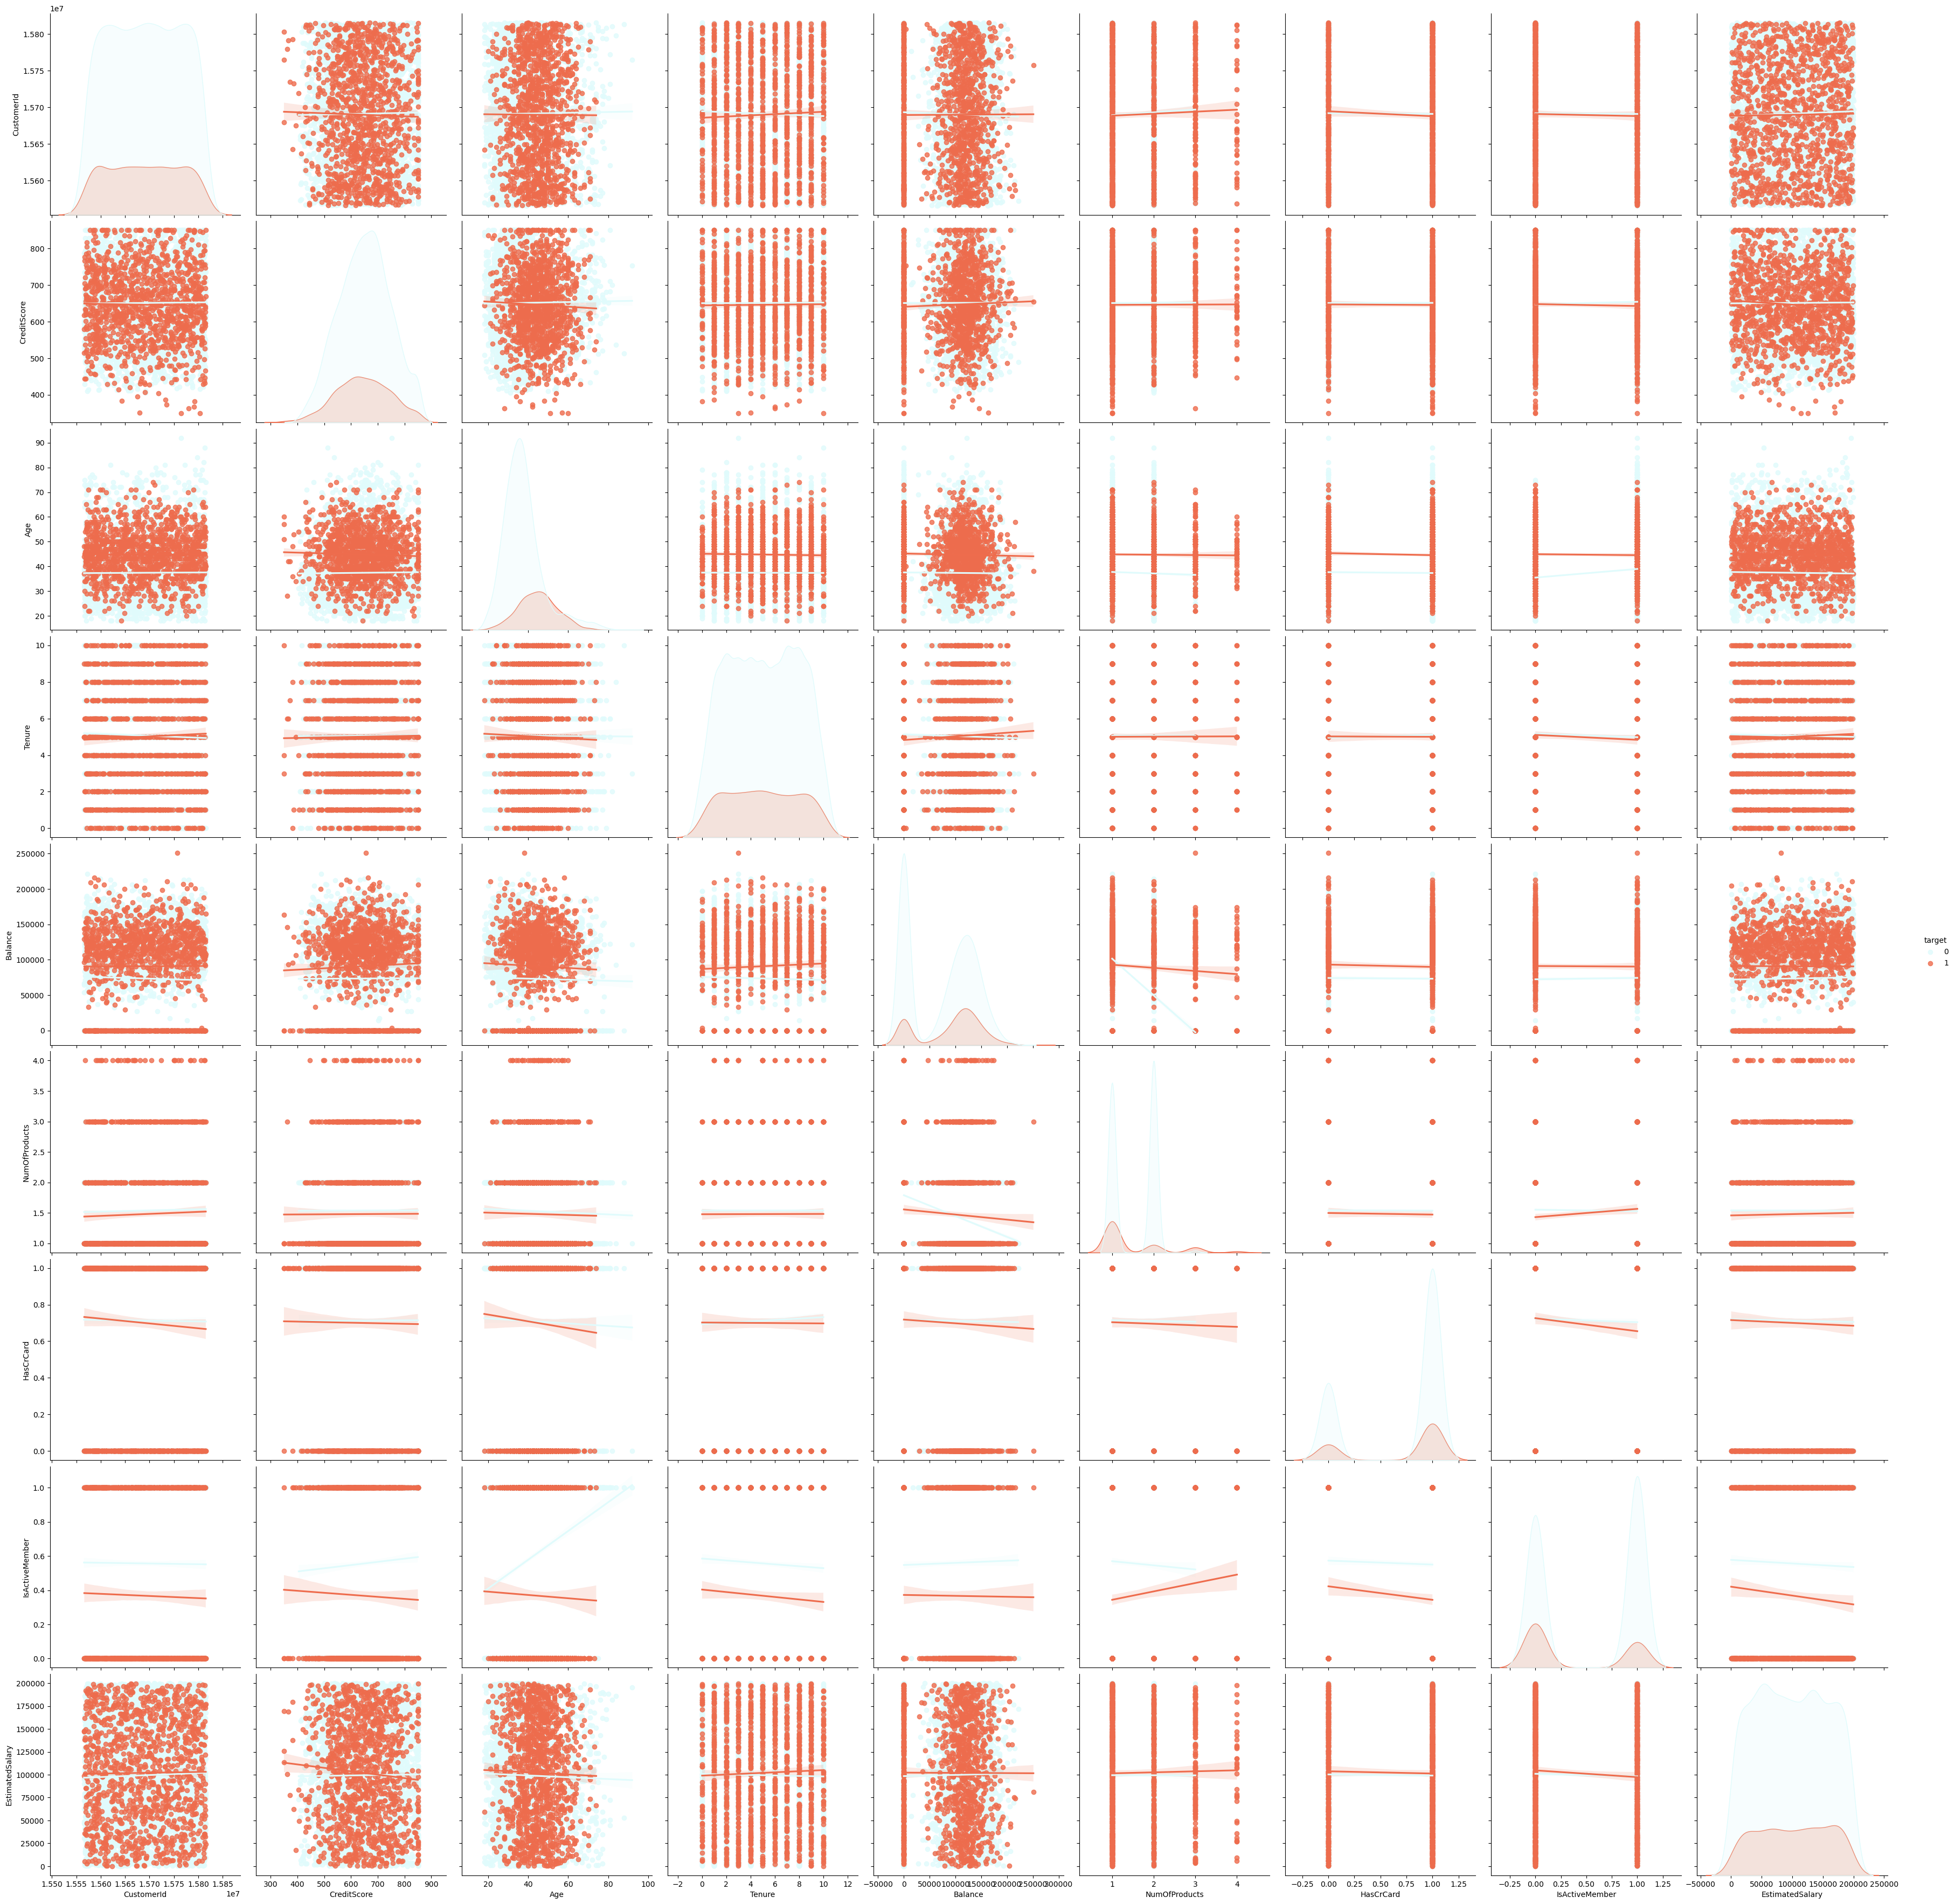

In [196]:
# PAIR PLOT

num_columns = ["CustomerId","CreditScore","Age","Tenure","Balance","NumOfProducts","HasCrCard","IsActiveMember","EstimatedSalary"]

sns.pairplot(df,
             hue='target',
             height=4,
             vars=num_columns,
             kind="reg");

## Check Outliers

Even though in the future outliers may be present we prefer to fit our model without taking them into account as the model will predict better.

We must look in our dataset just in case they exist and analyze them to find out what to do with them.

From the following graphs we can see that there are 3 attributes that have noticeable outliers: 👀
* **CreditScore**
* **Age**
* **NumOfProducts**

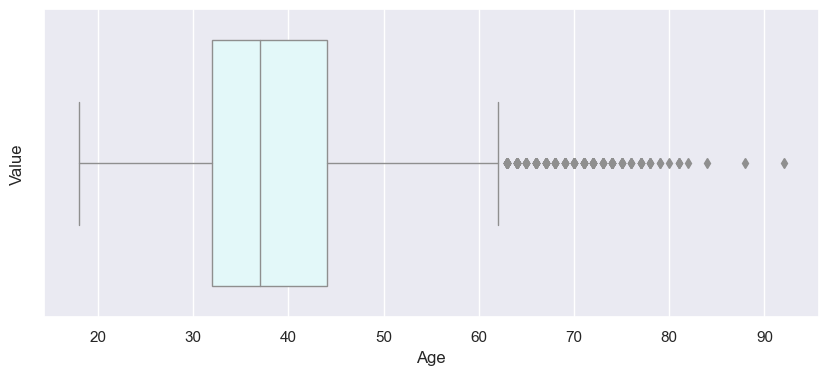

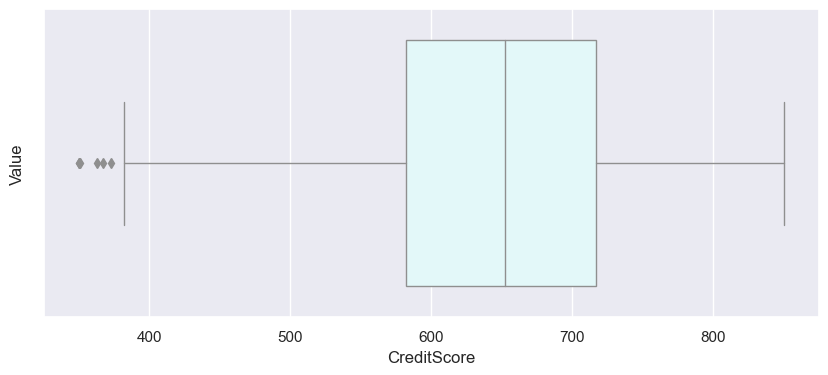

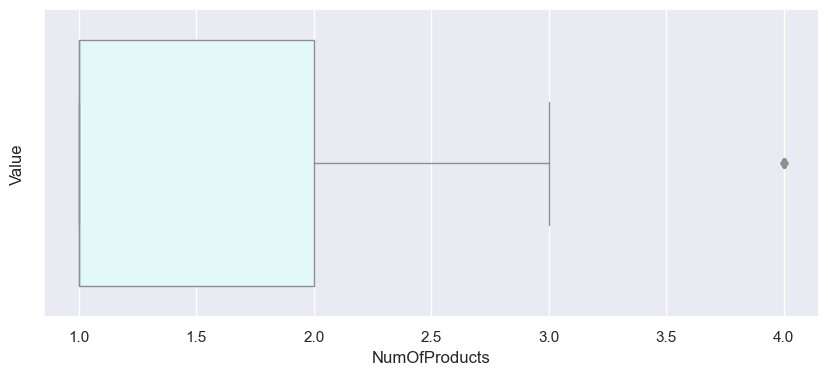

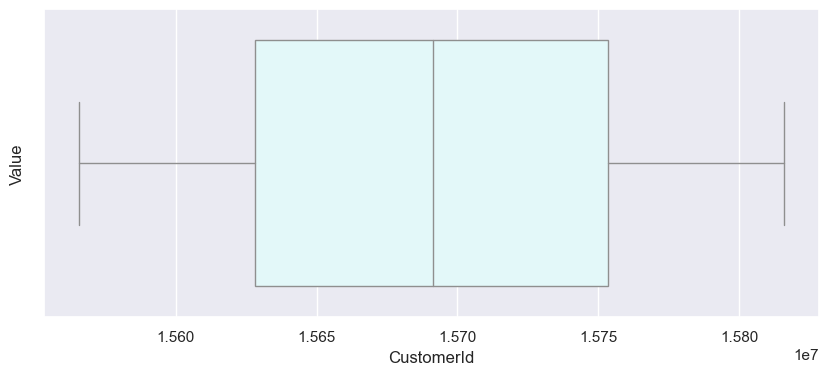

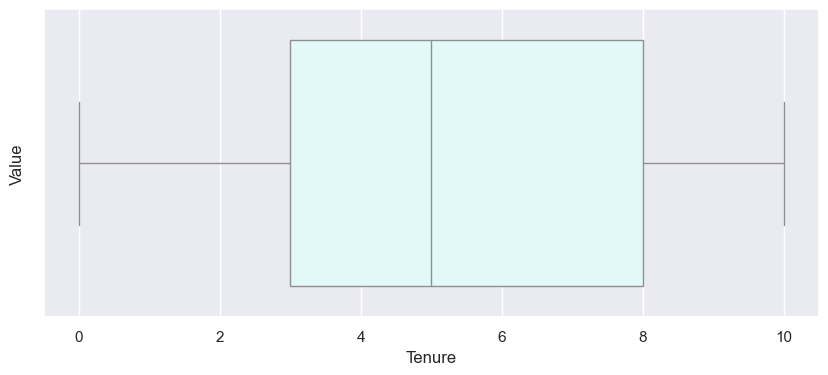

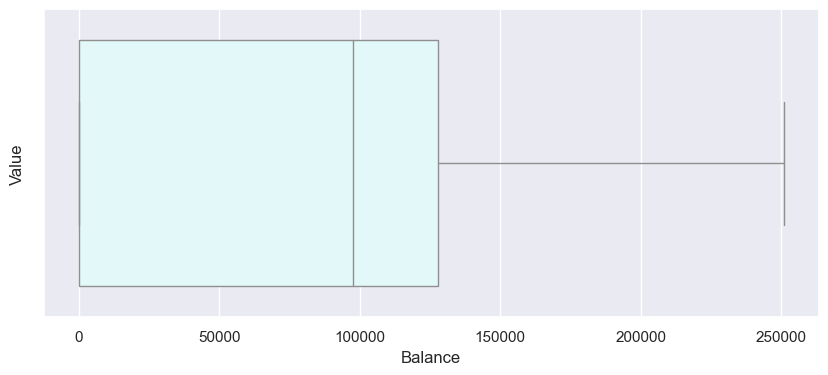

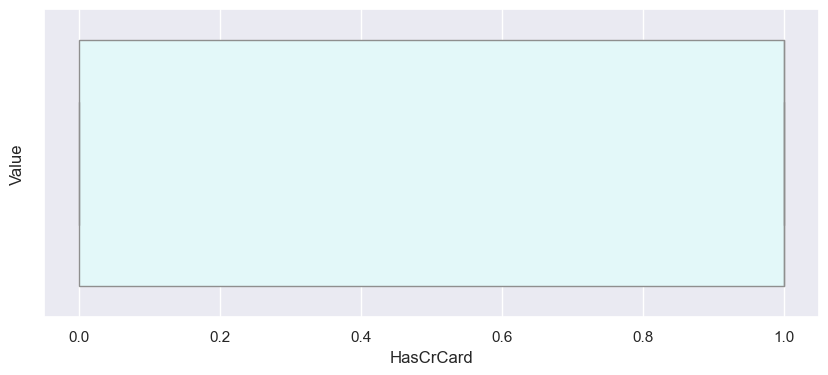

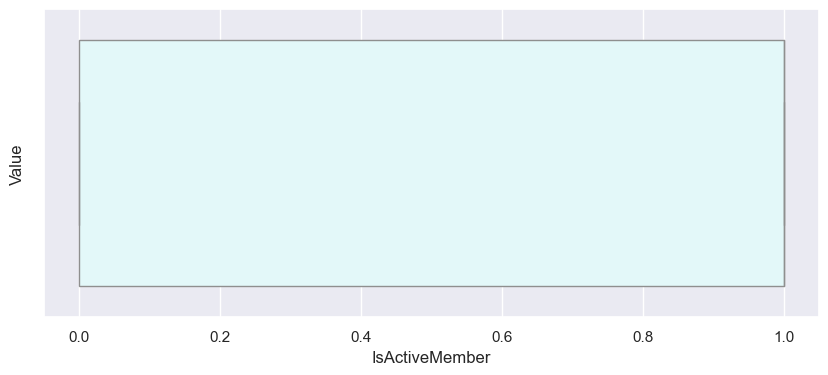

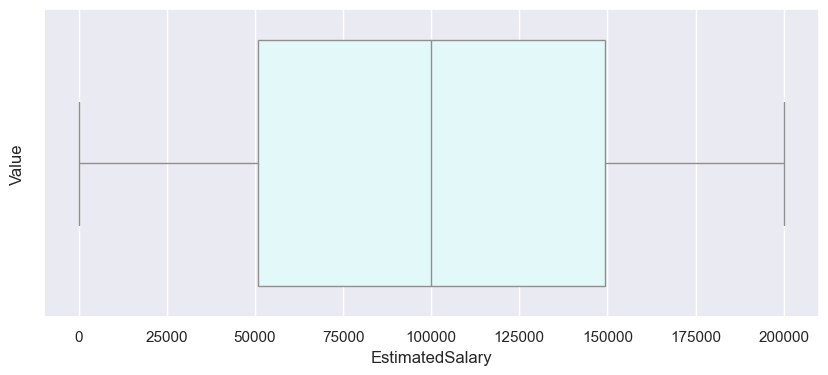

In [290]:
cat_list= ["Age", "CreditScore", "NumOfProducts", "CustomerId", "Tenure", "Balance", "HasCrCard", "IsActiveMember", "EstimatedSalary"]

for i in cat_list:
    fig, ax_box = plt.subplots(figsize=(10, 4))
    sns.boxplot(df[i], ax=ax_box, linewidth=1.0, palette=colors)
    ax_box.set_xlabel(i)
    ax_box.set_ylabel('Value')
    plt.show(block=False)
    plt.pause(0.1)
    plt.close(fig)

In [ ]:
# We will remove certain outliers without removing too many samples. Remember we have a sample of 6,000 rows in our train dataframe.


In [ ]:
for col in df.columns[df.dtypes == "float64"]:
    df[col] = df[col].astype("int64")


### Is Our Data Balanced ?

Most machine learning algorithms work best when the number of samples in each class is about equal. This is because most algorithms are designed to maximize accuracy and reduce errors.

If the dataframe has imbalanced classes you get a pretty high accuracy just by predicting the **majority class**, but you fail to capture the **minority class**, which is most often the point of creating the model in the first place. 


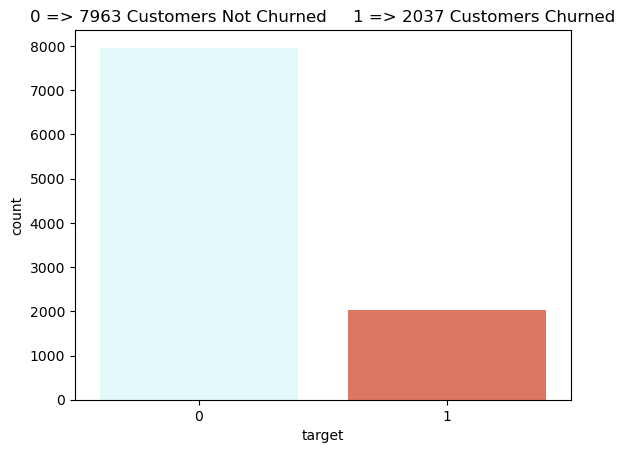

In [152]:
# In this example we can see that there is quite a big difference.
x, y  = df["target"].value_counts()

title = "0 => "+ str(x)+ " Customers Not Churned     1 => "+str(y)+ " Customers Churned"

sns.countplot(x="target", data=df).set(title=title)
plt.show()

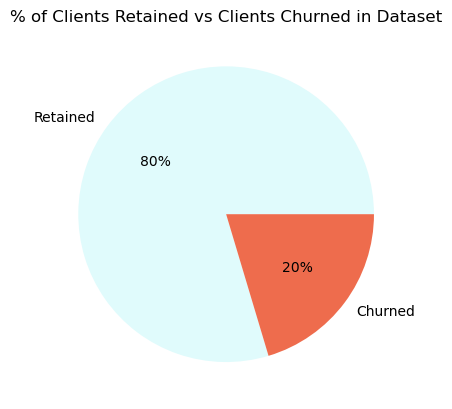

In [153]:
# Show as %
x, y  = df["target"].value_counts()

# plotting data on chart
plt.pie([x,y], labels=["Retained","Churned"], autopct='%.0f%%')
  
# displaying chart
plt.title("% of Clients Retained vs Clients Churned in Dataset")
plt.show()

### Balance Data by Random Under-Sample

From the above graph we can see that if we didn´t bother to train a model and just create a function that tells us that the client will not leave we would be 80% accurate!

This accuracy would be **misleading** as your overall accuracy would be high simply because most of the customers will not change bank.

Since our dataset is sufficiently large ( 7,963 retained clients vs 2,037 churned clients), we will **drop retained clients** in order to later make better predictions with our machine learning models.

Remember, that the **drawback** of undersampling is that we may **remove information** that may be **valuable.** We are supposing that having at least >1,000 different clients who are retained and churned is sufficient. We will actually end up with 4,074 clients (2,037 clients of each group).

In [154]:
# Remember how our df looked.
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,target
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [155]:
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(df.loc[:, 'CustomerId':'EstimatedSalary'], df['target'])
X_rus # We have 4074 rows (2,037 x 2) Same amount of 0 and 1

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15813503,Pickering,606,Spain,Male,37,8,154712.58,2,1,0,89099.18
1,15690695,Flynn,683,France,Female,33,9,0.00,2,1,1,38784.42
2,15750649,Uwakwe,744,France,Female,44,3,0.00,2,1,1,189016.14
3,15662955,Nicholls,697,France,Male,27,8,141223.68,2,1,0,90591.15
4,15755868,Farmer,562,France,Male,35,7,0.00,1,0,0,48869.67
...,...,...,...,...,...,...,...,...,...,...,...,...
4069,15672754,Burbidge,498,Germany,Male,42,3,152039.70,1,1,1,53445.17
4070,15768163,Griffin,655,Germany,Female,46,7,137145.12,1,1,0,115146.40
4071,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71
4072,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58


Text(0.5, 1.0, 'Random Under-Sampling')

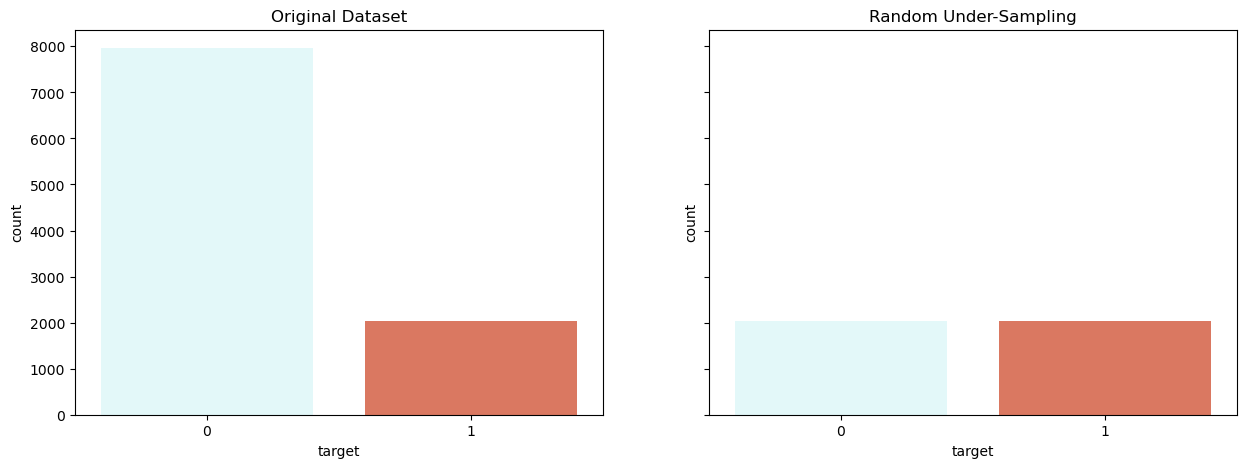

In [156]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

# Original target
sns.countplot(x="target", data=df, ax=axes[0])
axes[0].set_title("Original Dataset")

# RandomUnderSampler
sns.countplot(y_rus, ax=axes[1])
axes[1].set_title("Random Under-Sampling")


In [157]:
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,target
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [171]:
y_rus

0       0
1       0
2       0
3       0
4       0
       ..
4069    1
4070    1
4071    1
4072    1
4073    1
Name: target, Length: 4074, dtype: int64

In [169]:
new_df = pd.concat([X_rus, y_rus],ignore_index=False,axis=1,sort=False)
new_df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,target
0,15813503,Pickering,606,Spain,Male,37,8,154712.58,2,1,0,89099.18,0
1,15690695,Flynn,683,France,Female,33,9,0.00,2,1,1,38784.42,0
2,15750649,Uwakwe,744,France,Female,44,3,0.00,2,1,1,189016.14,0
3,15662955,Nicholls,697,France,Male,27,8,141223.68,2,1,0,90591.15,0
4,15755868,Farmer,562,France,Male,35,7,0.00,1,0,0,48869.67,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4069,15672754,Burbidge,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1
4070,15768163,Griffin,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1
4071,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
4072,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


## Machine Learning